In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import cv2
import numpy as np
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential
tf.config.run_functions_eagerly(True)
from google.colab import drive
drive.mount('/content/drive')



X_color_normal=[];X_color_defect=[]
X_bw_normal=[];X_bw_defect=[]

y_color_normal=[];y_bw_normal=[]
y_color_defect=[];y_bw_defect=[]

for i in range(1,59):
  image = cv2.imread(f'/content/drive/MyDrive/SE_innovative/Colored_model/Normal/normal_b_{i:0{3}}.jpg')
  if image is not None:
      gray_image = cv2.resize(image, (107, 108))  #average size of all images
      X_color_normal.append(gray_image)
      y_color_normal.append([0])
  else:
      print('Failed to open the image.')


nums=[10,13,27,31]
for i in nums:
  image = cv2.imread(f'/content/drive/MyDrive/SE_innovative/Colored_model/Normal/normal_c_{i:0{3}}.jpg')
  if image is not None:
      gray_image = cv2.resize(image, (107, 108))  #average size of all images
      X_color_normal.append(gray_image)
      y_color_normal.append([0])
  else:
      print('Failed to open the image.')




for i in range(1,100):
  image = cv2.imread(f'/content/drive/MyDrive/SE_innovative/Colored_model/Normal/normal_a_{i:0{3}}.jpeg')
  if image is not None:
      gray_image = cv2.resize(image, (107, 108))  #average size of all images
      X_bw_normal.append(gray_image)
      y_bw_normal.append([0])
  else:
      print('Failed to open the image.')


for i in range(1,39):
  image = cv2.imread(f'/content/drive/MyDrive/SE_innovative/Colored_model/Defected/defect_c_{i:0{3}}.jpg')
  if image is not None:
      gray_image = cv2.resize(image, (107, 108))  #average size of all images
      X_color_defect.append(gray_image)
      y_color_defect.append([1])
  else:
      print('Failed to open the image.')




for i in range(1,99):
  image = cv2.imread(f'/content/drive/MyDrive/SE_innovative/Defected/defect_b_{i:0{3}}.jpeg')
  if image is not None:
      gray_image = cv2.resize(image, (107, 108))  #average size of all images
      X_bw_defect.append(gray_image)
      y_bw_defect.append([1])
  else:
      print('Failed to open the image.')






y_color_normal=np.array(y_color_normal)
y_bw_normal=np.array(y_bw_normal)
y_color_defect=np.array(y_color_defect)
y_bw_defect=np.array(y_bw_defect)

X_color_normal=np.array(X_color_normal)
X_bw_normal=np.array(X_bw_normal)
X_color_defect=np.array(X_color_defect)
X_bw_defect=np.array(X_bw_defect)

data_augmentation=keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(108,107)),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.7)
])

X_color_normal1=data_augmentation(X_color_normal).numpy()
X_color_defect1=data_augmentation(X_color_defect).numpy()

X_color_normal2=data_augmentation(X_color_normal).numpy()
X_color_defect2=data_augmentation(X_color_defect).numpy()

X_color_normal3=data_augmentation(X_color_normal).numpy()
X_color_defect3=data_augmentation(X_color_defect).numpy()

X_color_normal4=data_augmentation(X_color_normal).numpy()
X_color_defect4=data_augmentation(X_color_defect).numpy()


X_normal=[];y_normal=[]
for i in X_color_normal1:
  X_normal.append(i);y_normal.append([0])
for i in X_color_normal2:
  X_normal.append(i);y_normal.append([0])
for i in X_color_normal3:
  X_normal.append(i);y_normal.append([0])
for i in X_color_normal4:
  X_normal.append(i);y_normal.append([0])
for i in X_bw_normal:
  X_normal.append(i);y_normal.append([0])



X_defect=[];y_defect=[]
for i in X_color_defect1:
  X_defect.append(i);y_defect.append([1])
for i in X_color_defect2:
  X_defect.append(i);y_defect.append([1])
for i in X_color_defect3:
  X_defect.append(i);y_defect.append([1])
for i in X_color_defect4:
  X_defect.append(i);y_defect.append([1])
for i in X_bw_defect:
  X_defect.append(i);y_defect.append([1])


X=[];y=[]
for i in X_normal:
  X.append(i);y.append([0])
for i in X_defect:
  X.append(i);y.append([1])
X=np.array(X)
y=np.array(y)

X_new=[];y_new=[]
for i in range(len(X)):
  img_normalized=X[i].astype(float) / 255.0
  X_new.append(img_normalized)
  y_new.append(y[i])
X_new=np.array(X_new)
y_new=np.array(y_new)

Mounted at /content/drive
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.
Failed to open the image.


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [ ]:
cnn_colored = models.Sequential([
    layers.Conv2D(filters=10, kernel_size=(10, 10), activation='relu', input_shape=(108, 107,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(500, activation='sigmoid'),
    # layers.Dense(500, activation='relu'),
    # layers.Dense(400, activation='sigmoid'),
    # layers.Dense(300, activation='relu'),
    # layers.Dense(200, activation='sigmoid'),
    # layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(2, activation='softmax')
])

cnn_colored.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# cnn_colored.fit(X_train,y_train,epochs=100)
batch_size = 32
epochs = 2
hist=cnn_colored.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/2
13/13 [==============================] - 17s 1s/step - loss: 0.1976 - accuracy: 0.9536 - val_loss: 0.4821 - val_accuracy: 0.8041
Epoch 2/2
13/13 [==============================] - 17s 1s/step - loss: 0.1461 - accuracy: 0.9794 - val_loss: 0.4199 - val_accuracy: 0.8041


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

cnn_pred=cnn_colored.predict(X_test)

temp2=[]
for i in cnn_pred:
  temp2.append(np.argmax(i))
temp2=np.array(temp2)
print(classification_report(y_test,temp2))




4/4 [==============================] - 1s 168ms/step
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        51
           1       0.97      0.83      0.89        46

    accuracy                           0.91        97
   macro avg       0.92      0.90      0.91        97
weighted avg       0.92      0.91      0.91        97



In [ ]:
import pickle

with open('/content/drive/MyDrive/SE_innovative/Colored_model/Colored_cnn_model_4.0(Accuracy 0.91).pkl','wb') as f:
  pickle.dump(cnn_colored,f)

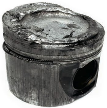

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image1 = cv2.imread(f'/content/drive/MyDrive/SE_innovative/test1.jpeg')
image1 = cv2.resize(image1, (107, 108))

image2 = cv2.imread(f'/content/drive/MyDrive/SE_innovative/test2.jpeg')
image2 = cv2.resize(image2, (107, 108))

image3 = cv2.imread(f'/content/drive/MyDrive/SE_innovative/test3.jpeg')
image3 = cv2.resize(image3, (107, 108))


cv2_imshow(image1)
cv2.waitKey(0)
cv2.destroyAllWindows()


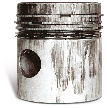

In [ ]:
cv2_imshow(image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

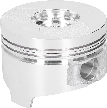

In [ ]:
cv2_imshow(image3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
image1 = np.expand_dims(image1, axis=0)
image2 = np.expand_dims(image2, axis=0)
image3 = np.expand_dims(image3, axis=0)

In [ ]:
cnn_colored.predict(image1)
# resized_image.shape

1/1 [==============================] - 0s 56ms/step


array([[0.22862022, 0.7713797 ]], dtype=float32)

In [ ]:
cnn_colored.predict(image2)

1/1 [==============================] - 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


array([[0.9154195 , 0.08458051]], dtype=float32)

In [ ]:
cnn_colored.predict(image3)

1/1 [==============================] - 0s 36ms/step


array([[0.9072962, 0.0927038]], dtype=float32)